# Beta-Bernoulli model with mixture prior
- **PML book1, Ch. 4.6.2.11**
    For example, suppose we want to predict the outcome of a coin toss at a casino, and we believe that the
    coin may be fair, but may equally likely be biased towards heads. This prior cannot be represented
    by a beta distribution. Fortunately, it can be represented as a mixture of beta distributions.

$$
p(\theta) = 0.5 Beta(\theta|20, 20) + 0.5 Beta(\theta| 30, 10)
$$

In [1]:
import scipy.stats as stats 
from scipy.special import beta 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

Mixture probability update

In [2]:
pi_prior = np.array([0.5, 0.5])

N1, N0 = 20, 10 
ab1 = [20, 20]
ab2 = [30, 10]
pi = np.array([beta(20+N1, 20+N0) / beta(20,20), beta(30+N1,10+N0)/beta(30,10)])
pi = pi * pi_prior
pi /= pi.sum()
print('Posterior Mixture Probability: ', pi)

Posterior Mixture Probability:  [0.34575967 0.65424033]


Posterior PDF

In [3]:
th = np.linspace(0.01, 0.99, 100);  # domain of theta

prior1 = stats.beta(20,20).pdf(th)
prior2 = stats.beta(30,10).pdf(th)
prior = pi_prior[0] * prior1 + pi_prior[1] * prior2 

post1 = stats.beta(20+N1, 20+N0).pdf(th)
post2 = stats.beta(30+N1, 10+N0).pdf(th)

post = pi[0] * post1 + pi[1] * post2 

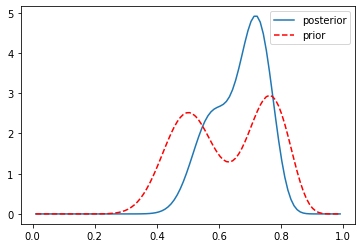

In [4]:
plt.plot(th, post, label='posterior');
plt.plot(th, prior, 'r--', label='prior');
plt.legend();

$$
Pr[\theta > 0.5 | D] = \sum_k Pr[\theta > 0.5|D, h=k] p(h=k|D)
$$

In [5]:
pr1 = 1 - stats.beta(20+N1, 20+N0).cdf(0.5)
pr2 = 1 - stats.beta(30+N1, 10+N0).cdf(0.5)
Pr = pr1 * pi[0] + pr2 * pi[1]
print(f"Pr [\u03b8>0.5|D] = ", Pr)

Pr [θ>0.5|D] =  0.9604342597978659


## When $\theta$ at discrete grids

P = [0.5 , 0.5] at [0.5, 0.7]

N1 = 20, N0 = 10

In [23]:
theta = np.array([.5, .7])
prior = np.array([.5, .5])
L = np.array([ th**N1 * (1-th)**N0 for th in theta])
LP = L * prior 
Z = LP.sum()
posterior = LP / Z

for p, th in zip(posterior, theta):
    print(f"P[th={th}|Data] = {np.round(p, 4)}")

P[th=0.5|Data] = 0.165
P[th=0.7|Data] = 0.835


P = [0.5 , 0.25, 0.25] at theta = [0.5, 0.6, 0.7]

N1 = 20, N0 = 10

In [17]:
theta = np.array([.5, .6, .7])
# prior = np.array([.5, .25, .25])
prior = np.array([1/len(theta) for _ in range(len(theta))])  # uniform
L = np.array([ th**N1 * (1-th)**N0 for th in theta])
LP = L * prior 
Z = LP.sum()
posterior = LP / Z

for p, th in zip(posterior, theta):
    print(f"P[th={th}|Data] = {np.round(p, 4)}")

P[th=0.5|Data] = 0.0983
P[th=0.6|Data] = 0.4045
P[th=0.7|Data] = 0.4972


P = [0.5 , 0.25, 0.25] at theta = [0.5, 0.6, 0.7]

N1 = 20, N0 = 10

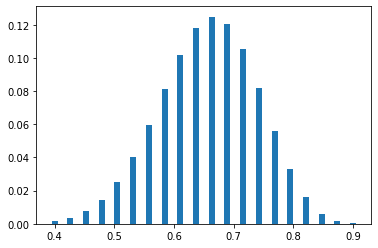

In [22]:
theta = np.linspace(.4, .9, 20)
prior = np.array([1./len(theta) for _ in range(len(theta))])
L = np.array([ th**N1 * (1-th)**N0 for th in theta])
LP = L * prior 
Z = LP.sum()
posterior = LP / Z

plt.bar(theta, posterior, width=.01);